In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bios = pd.read_csv('./data/bios.csv')
olympics = pd.read_excel('./data/olympics-data.xlsx')


# Merge Data

In [8]:
# Display column names of all data
column_names = [bios.columns, nocs.columns, olympics.columns]
pd.DataFrame(column_names, index=['bios', 'nocs', 'olympics'])

,0,1,2,3,4,5,6,7,8,9
bios,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
nocs,NOC,region,notes,None,None,None,None,None,None,None
olympics,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date


In [11]:
# Display column names and dtypes from all three dataframes
column_info = [bios.dtypes, nocs.dtypes, olympics.dtypes]
pd.DataFrame(column_info, index=['bios', 'nocs', 'olympics'])

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,region,notes
bios,int64,object,object,object,object,object,object,float64,float64,object,NaN,NaN
nocs,NaN,NaN,NaN,NaN,NaN,NaN,object,NaN,NaN,NaN,object,object
olympics,int64,object,object,object,object,object,object,float64,float64,object,NaN,NaN


In [15]:
#merge bios and olympics dataframes
df = pd.merge(bios, olympics, how='inner', on='athlete_id')

# Function that goes through and deletes all columns that end with '_y'
def drop_y(df):
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)

drop_y(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   athlete_id      145500 non-null  int64  
 1   name_x          145500 non-null  object 
 2   born_date_x     143693 non-null  object 
 3   born_city_x     110908 non-null  object 
 4   born_region_x   110908 non-null  object 
 5   born_country_x  110908 non-null  object 
 6   NOC_x           145499 non-null  object 
 7   height_cm_x     106651 non-null  float64
 8   weight_kg_x     102070 non-null  float64
 9   died_date_x     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [20]:
# Function that renames all columsn that end with '_x' to remove the '_x'
def rename_x(df):
    to_rename = [x for x in df if x.endswith('_x')]

    # Rename columns
    df.rename(columns={x: x[:-2] for x in to_rename}, inplace=True)


rename_x(df)



athlete_id
name
born_date
born_city
born_region
born_country
NOC
height_cm
weight_kg
died_date


# Who are the 3 Tallest USA Olympians?

In [24]:

usa_olympians = df[df['born_country'] == 'USA']
tallest_olympians = usa_olympians.nlargest(3, 'height_cm')
tallest_olympians

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
5781,5804,Tommy Burleson,1952-02-24,Crossnore,North Carolina,USA,United States,223.0,102.0,NaN
6722,6755,Shaquille O'Neal,1972-03-06,Newark,New Jersey,USA,United States,216.0,137.0,NaN
6937,6972,David Robinson,1965-08-06,Key West,Florida,USA,United States,216.0,107.0,NaN


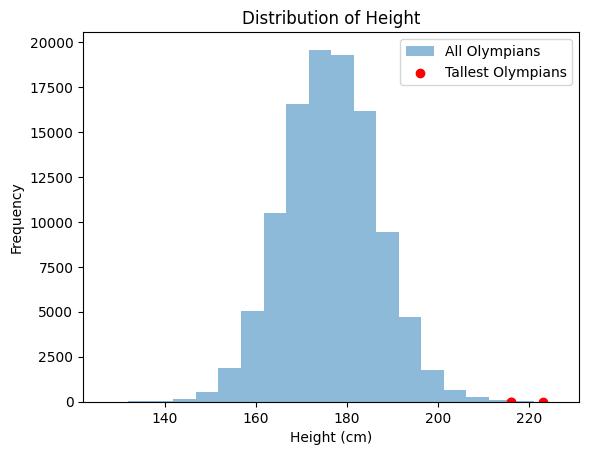

In [26]:
import matplotlib.pyplot as plt

# Plot the distribution of height from the df dataframe
plt.hist(df['height_cm'], bins=20, alpha=0.5, label='All Olympians')

# Plot the tallest_olympians as red dots
plt.scatter(tallest_olympians['height_cm'], [0] * len(tallest_olympians), color='red', label='Tallest Olympians')

# Set labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Height')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [34]:
# Analyze what born_citys have had the most olympians
born_city_counts = df['born_city'].value_counts()
born_city_counts.head(15)

born_city
Budapest                          1378
Moskva (Moscow)                    883
Oslo                               708
Stockholm                          629
Praha (Prague)                     600
Toronto                            579
Wien (Vienna)                      547
Buenos Aires                       538
København (Copenhagen)             523
Sydney                             497
Montréal                           468
Berlin                             467
Ciudad de México (Mexico City)     455
Helsinki                           439
Rio de Janeiro                     433
Name: count, dtype: int64

In [31]:
medals = pd.read_csv('./data/athlete_events.csv')

# merge medals and df on name and borndate
medals.dtypes


ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [37]:
most_medals = medals.groupby('Name').size().sort_values(ascending=False)
most_medals.head(10)

Name
Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
Jean Lucien Nicolas Jacoby          32
Alfrd (Arnold-) Hajs (Guttmann-)    32
Andreas Wecker                      32
Alexandros Theofilakis              32
Alfred James Munnings               31
dtype: int64

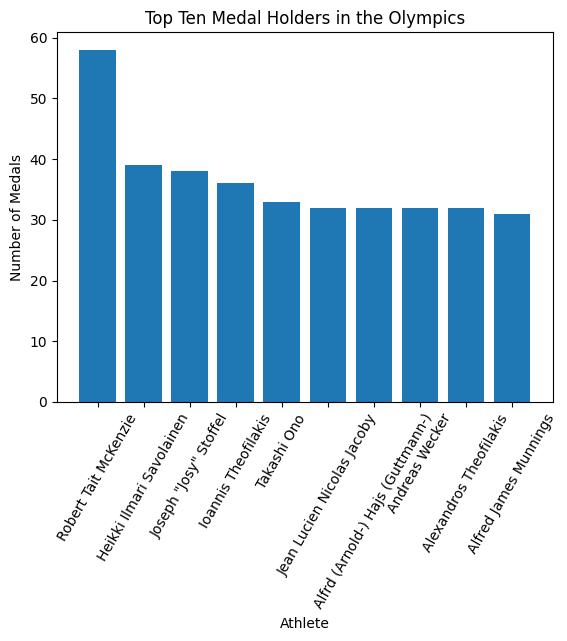

In [40]:
import matplotlib.pyplot as plt

# Get the top ten medal holders
top_ten_medal_holders = most_medals.head(10)

# Create a bar plot
plt.bar(top_ten_medal_holders.index, top_ten_medal_holders.values)

# Set labels and title
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.title('Top Ten Medal Holders in the Olympics')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=60)

# Show the plot
plt.show()

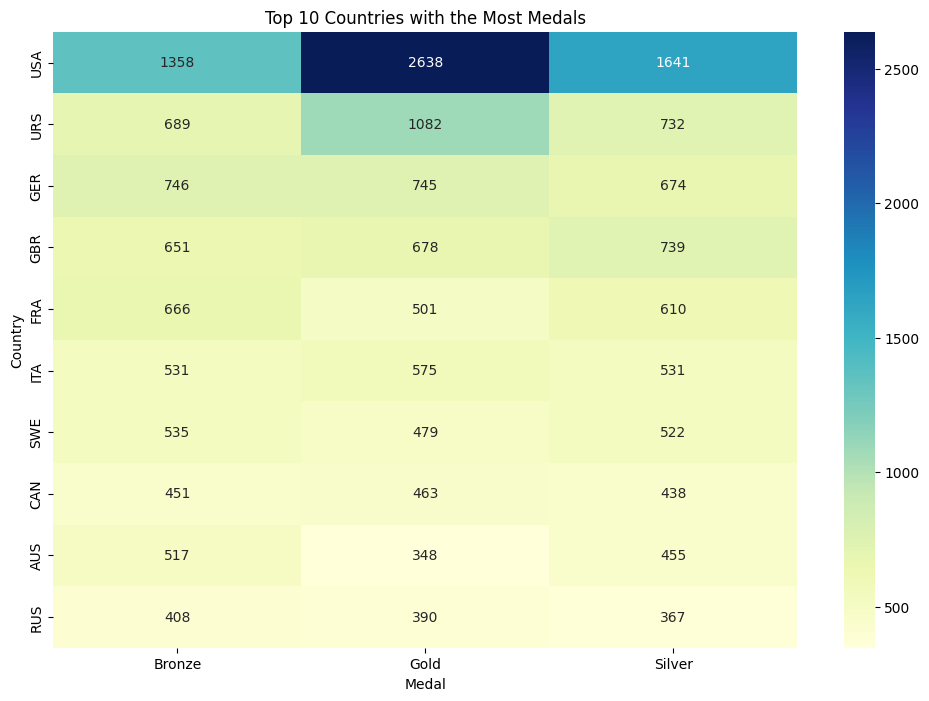

In [41]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a pivot table to aggregate the medal counts by country
medal_counts = medals.pivot_table(index='NOC', columns='Medal', aggfunc='size', fill_value=0)

# Sort the countries by the total number of medals
medal_counts['Total'] = medal_counts.sum(axis=1)
medal_counts = medal_counts.sort_values(by='Total', ascending=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(medal_counts.iloc[:10, :-1], annot=True, fmt='d', cmap='YlGnBu')

# Set labels and title
plt.xlabel('Medal')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Most Medals')

# Show the plot
plt.show()